In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [6]:
# Full benchmark data
data = [
    # Single-Threaded Auto-Cleanup enabled
    ["1%", "Hash-Consed", 73.307853209, 3914517303, 3913983167, 1735426263, 534136, 10000, 171],
    ["1%", "Non-Hash-Consed", 20.807243916, 3914503139, 1772708963, 1735426263, 2141794176, 10000, None],
    ["33%", "Hash-Consed", 73.410786958, 3971447160, 3970594784, 1800757977, 852376, 10000, 3333],
    ["33%", "Non-Hash-Consed", 20.567648292, 3971201220, 1840943364, 1800757977, 2130257856, 10000, None],
    ["50%", "Hash-Consed", 73.278753875, 4042141956, 4041086588, 1848886251, 1055368, 10000, 5000],
    ["50%", "Non-Hash-Consed", 20.848761625, 4041703400, 1889065064, 1848886251, 2152638336, 10000, None],
    ["67%", "Hash-Consed", 74.522961541, 4052540882, 4051365194, 1862588361, 1175688, 10000, 6504],
    ["67%", "Non-Hash-Consed", 20.817763625, 4052054198, 1899075254, 1862588361, 2152978944, 10000, None],
    # ... Additional data points for other categories would be added here
]

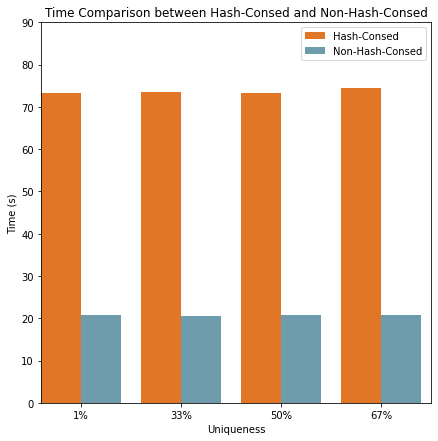

In [21]:
# Creating DataFrame
columns = ["Uniqueness", "Type", "Time (s)", "Bytes Allocated", "Bytes Deallocated", "Bytes Reallocated", "Bytes Utilized", "Vector Length", "Table Length"]
df = pd.DataFrame(data, columns=columns)

# Creating a bar chart for Time Comparison
fig, ax = plt.subplots(figsize=(7, 7))
df[df['Type'] == "Hash-Consed"].plot(kind='bar', x='Uniqueness', y='Time (s)', color='#e17626', ax=ax, position=1, width=0.4, label='Hash-Consed')
df[df['Type'] == "Non-Hash-Consed"].plot(kind='bar', x='Uniqueness', y='Time (s)', color='#6f9cac', ax=ax, position=0, width=0.4, label='Non-Hash-Consed')
plt.ylabel('Time (s)')
plt.title('Time Comparison between Hash-Consed and Non-Hash-Consed')
plt.xticks(rotation=0)
ax.set_ylim(0, 90)
ax.set_xlim(-0.4, 3.5)
plt.legend()
plt.savefig('timeConsumed.png', transparent=True, dpi=300)
plt.show()

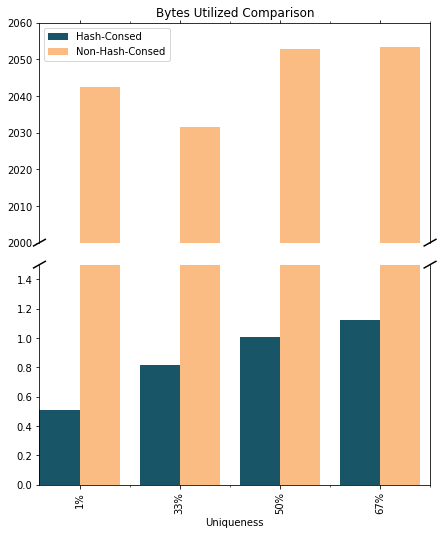

In [25]:
# Creating a bar chart for Bytes Utilized Comparison
df['Megabytes Utilized'] = df['Bytes Utilized'] / 1048576
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 8.5))

df[df['Type'] == "Hash-Consed"].plot(kind='bar', x='Uniqueness', y='Megabytes Utilized', color='#185566', ax=ax, position=1, width=0.4, label='Hash-Consed')
df[df['Type'] == "Non-Hash-Consed"].plot(kind='bar', x='Uniqueness', y='Megabytes Utilized', color='#fabc83', ax=ax, position=0, width=0.4, label='Non-Hash-Consed')

# For the second subplot, we omit the labels to avoid them appearing in the legend
df[df['Type'] == "Hash-Consed"].plot(kind='bar', x='Uniqueness', y='Megabytes Utilized', color='#185566', ax=ax2, position=1, width=0.4)
df[df['Type'] == "Non-Hash-Consed"].plot(kind='bar', x='Uniqueness', y='Megabytes Utilized', color='#fabc83', ax=ax2, position=0, width=0.4)


ax.title.set_text('Bytes Utilized Comparison')

# Set the y-axis limits for both axes
ax.set_ylim(2000, 2060)  # Upper part for larger values
ax2.set_ylim(0, 1.5)             # Lower part for smaller values
ax.set_xlim(-0.4, 3.5)
ax2.set_xlim(-0.4, 3.5)
# Hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# Diagonal lines for axis break
d = .015  # Size of diagonal lines
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal
kwargs.update(transform=ax2.transAxes)       # Switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) # Bottom-right diagonal
ax2.get_legend().remove()  # Remove the legend from the second subplot

plt.subplots_adjust(hspace=0.1)  # Adjust space between the two plots
plt.savefig('bytesUtilized.png', transparent=True, dpi=300)
plt.show()

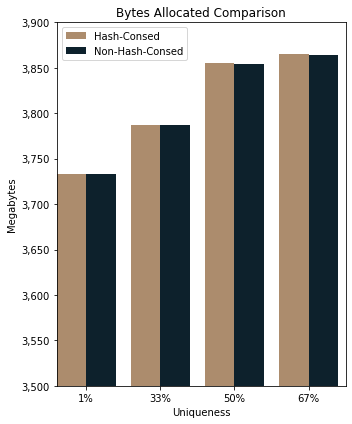

In [17]:
# Creating a bar chart for Bytes Allocated Comparison
df['Megabytes Allocated'] = df['Bytes Allocated'] / 1048576
fig, ax = plt.subplots(figsize=(5, 6))
df[df['Type'] == "Hash-Consed"].plot(kind='bar', x='Uniqueness', y='Megabytes Allocated', color='#ac8c6d', ax=ax, position=1, width=0.4, label='Hash-Consed')
df[df['Type'] == "Non-Hash-Consed"].plot(kind='bar', x='Uniqueness', y='Megabytes Allocated', color='#0d212c', ax=ax, position=0, width=0.4, label='Non-Hash-Consed')

plt.ylabel('Megabytes')
plt.title('Bytes Allocated Comparison')
plt.xticks(rotation=0)
plt.legend()

# Set y-axis limits
ax.set_ylim(3500, 3900)
ax.set_xlim(-0.4, 3.5)

# Format the y-axis to display full numbers
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.tight_layout()
plt.savefig('bytesAllocated.png', transparent=True, dpi=300)
plt.show()

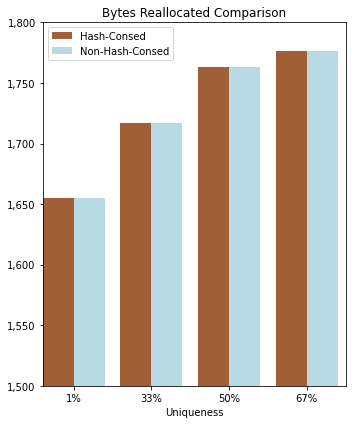

In [18]:
# Creating a bar chart for Bytes Allocated Comparison
df['Megabytes Reallocated'] = df['Bytes Reallocated'] / 1048576
fig, ax = plt.subplots(figsize=(5, 6))
df[df['Type'] == "Hash-Consed"].plot(kind='bar', x='Uniqueness', y='Megabytes Reallocated', color='#a05f35', ax=ax, position=1, width=0.4, label='Hash-Consed')
df[df['Type'] == "Non-Hash-Consed"].plot(kind='bar', x='Uniqueness', y='Megabytes Reallocated', color='#b7dae4', ax=ax, position=0, width=0.4, label='Non-Hash-Consed')

plt.title('Bytes Reallocated Comparison')
plt.xticks(rotation=0)
plt.legend()

# Set y-axis limits
ax.set_ylim(1500, 1800)
ax.set_xlim(-0.4, 3.5)

# Format the y-axis to display full numbers
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.tight_layout()
plt.savefig('bytesReallocated.png', transparent=True, dpi=300)
plt.show()